In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
humidity_df = pd.read_csv('humidity.csv')
pressure_df = pd.read_csv('pressure.csv')
temperature_df = pd.read_csv('temperature.csv')
weather_description_df = pd.read_csv('weather_description.csv')
wind_direction_df = pd.read_csv('wind_direction.csv')
wind_speed_df = pd.read_csv('wind_speed.csv')

In [3]:
humidity = humidity_df[['datetime', 'Minneapolis']]
pressure = pressure_df[['datetime', 'Minneapolis']]
temperature = temperature_df[['datetime', 'Minneapolis']]
weather_description = weather_description_df[['datetime', 'Minneapolis']]
wind_direction = wind_direction_df[['datetime', 'Minneapolis']]
wind_speed = wind_speed_df[['datetime', 'Minneapolis']]

In [4]:
wind_speed.head()

,datetime,Minneapolis
0,2012-10-01 12:00:00,NaN
1,2012-10-01 13:00:00,3.0
2,2012-10-01 14:00:00,3.0
3,2012-10-01 15:00:00,3.0
4,2012-10-01 16:00:00,3.0


In [5]:
weather_df = (weather_description.merge(humidity, on = 'datetime')
             .merge(pressure, on = 'datetime')
             .merge(temperature, on = 'datetime')
             .merge(wind_direction, on = 'datetime')
             .merge(wind_speed, on = 'datetime')
             )
weather_df.columns = ['Datetime', 'Description', 'Humidity', 'Pressure', 'Temperature', 'Wind_Direction', 'Wind_Speed'] 
weather_df.head()

,Datetime,Description,Humidity,Pressure,Temperature,Wind_Direction,Wind_Speed
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-10-01 13:00:00,broken clouds,67.0,1012.0,286.870000,330.0,3.0
2,2012-10-01 14:00:00,broken clouds,66.0,1012.0,286.893636,329.0,3.0
3,2012-10-01 15:00:00,broken clouds,66.0,1012.0,286.951401,329.0,3.0
4,2012-10-01 16:00:00,broken clouds,65.0,1012.0,287.009166,329.0,3.0


In [6]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45253 entries, 0 to 45252
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Datetime        45253 non-null  object 
 1   Description     45252 non-null  object 
 2   Humidity        44743 non-null  float64
 3   Pressure        45236 non-null  float64
 4   Temperature     45240 non-null  float64
 5   Wind_Direction  45252 non-null  float64
 6   Wind_Speed      45250 non-null  float64
dtypes: float64(5), object(2)
memory usage: 2.8+ MB


In [7]:
#Checking the amount of missing values
weather_df.isnull().sum()

Datetime            0
Description         1
Humidity          510
Pressure           17
Temperature        13
Wind_Direction      1
Wind_Speed          3
dtype: int64

In [8]:
#Checking the percentage of missing values
weather_df.isnull().mean()*100

Datetime          0.000000
Description       0.002210
Humidity          1.126997
Pressure          0.037567
Temperature       0.028727
Wind_Direction    0.002210
Wind_Speed        0.006629
dtype: float64

In [9]:
#Since the amount of missing values is very minute, so dropping all of them
weather_df.dropna(inplace=True)

In [10]:
weather_df.isnull().sum()

Datetime          0
Description       0
Humidity          0
Pressure          0
Temperature       0
Wind_Direction    0
Wind_Speed        0
dtype: int64

In [11]:
weather_df.describe()

,Humidity,Pressure,Temperature,Wind_Direction,Wind_Speed
count,44737.000000,44737.000000,44737.000000,44737.000000,44737.000000
mean,71.247469,1017.477792,280.779489,200.259025,3.383821
std,17.238135,11.247852,12.800591,99.342988,2.023547
min,13.000000,961.000000,242.336667,0.000000,0.000000
25%,60.000000,1011.000000,271.770000,130.000000,2.000000
50%,72.000000,1017.000000,281.850000,200.000000,3.000000
75%,85.000000,1024.000000,291.397000,290.000000,5.000000
max,100.000000,1063.000000,308.240000,360.000000,16.000000


In [12]:
weather_df.columns

Index(['Datetime', 'Description', 'Humidity', 'Pressure', 'Temperature',
       'Wind_Direction', 'Wind_Speed'],
      dtype='object')

In [13]:
weather_df['Description'].unique()

array(['broken clouds', 'scattered clouds', 'overcast clouds',
       'sky is clear', 'few clouds', 'light rain',
       'light intensity drizzle', 'mist', 'haze', 'fog', 'drizzle',
       'moderate rain', 'proximity thunderstorm',
       'proximity thunderstorm with rain', 'heavy snow', 'snow',
       'light snow', 'heavy intensity rain', 'shower snow',
       'light rain and snow', 'squalls', 'thunderstorm with heavy rain',
       'thunderstorm with rain', 'thunderstorm with light rain',
       'heavy intensity drizzle', 'thunderstorm with light drizzle',
       'thunderstorm', 'very heavy rain',
       'proximity thunderstorm with drizzle', 'proximity shower rain',
       'light intensity shower rain', 'light shower snow', 'smoke'],
      dtype=object)

In [14]:
weather_df['Description'].nunique()

33

In [15]:
#Amount of unqiue data points is too much to make plots
weather_df['Description'].value_counts().sort_values(ascending = False)

sky is clear                           14139
broken clouds                           5476
overcast clouds                         5200
scattered clouds                        4131
light rain                              3295
mist                                    2871
few clouds                              2706
light snow                              1763
moderate rain                           1436
haze                                     669
light intensity drizzle                  624
fog                                      468
drizzle                                  415
heavy intensity rain                     353
snow                                     317
proximity thunderstorm                   295
heavy snow                               291
thunderstorm                              56
proximity shower rain                     46
heavy intensity drizzle                   37
proximity thunderstorm with rain          34
very heavy rain                           26
thundersto

In [16]:
# A Clear weather is more frequent in Minneapolis Minnesota

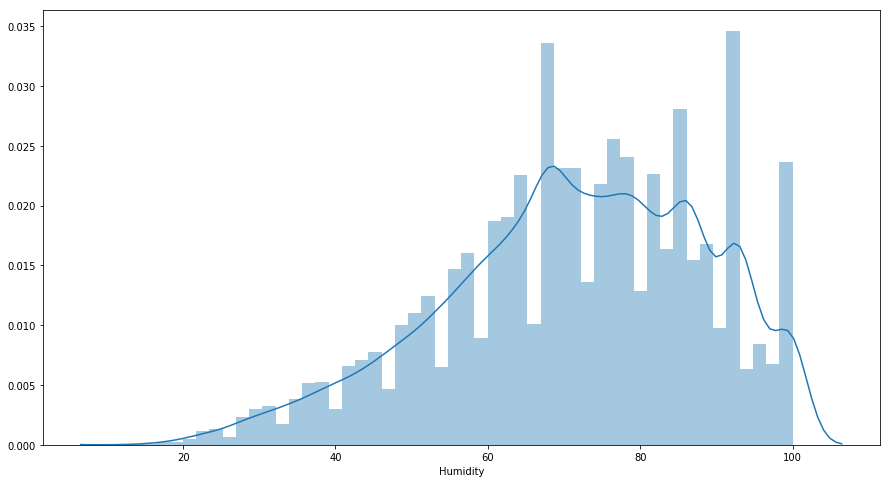

In [17]:
plt.figure(figsize=(15,8))
sns.distplot(weather_df['Humidity'], kde=True)

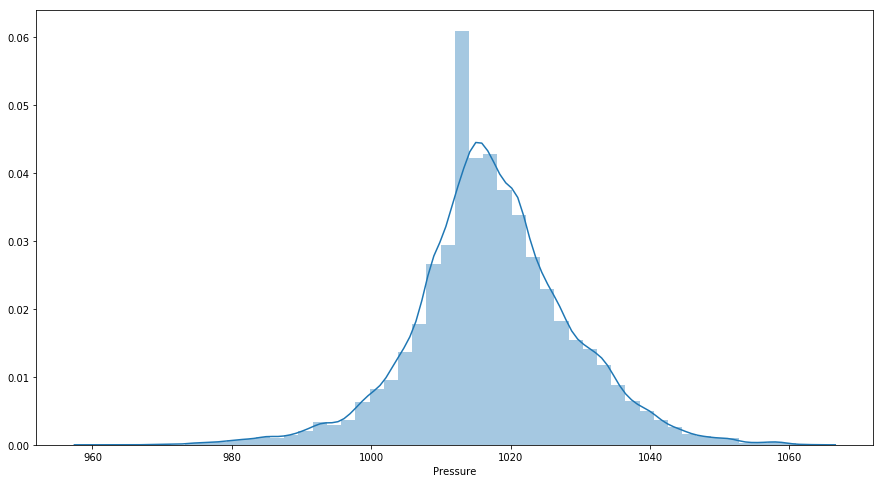

In [18]:
plt.figure(figsize=(15,8))
sns.distplot(weather_df['Pressure'], kde=True)

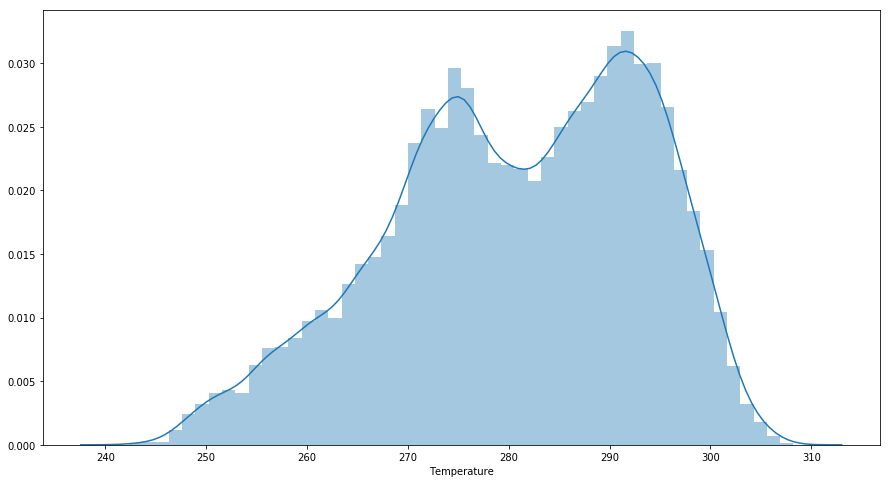

In [19]:
plt.figure(figsize=(15,8))
sns.distplot(weather_df['Temperature'], kde=True)

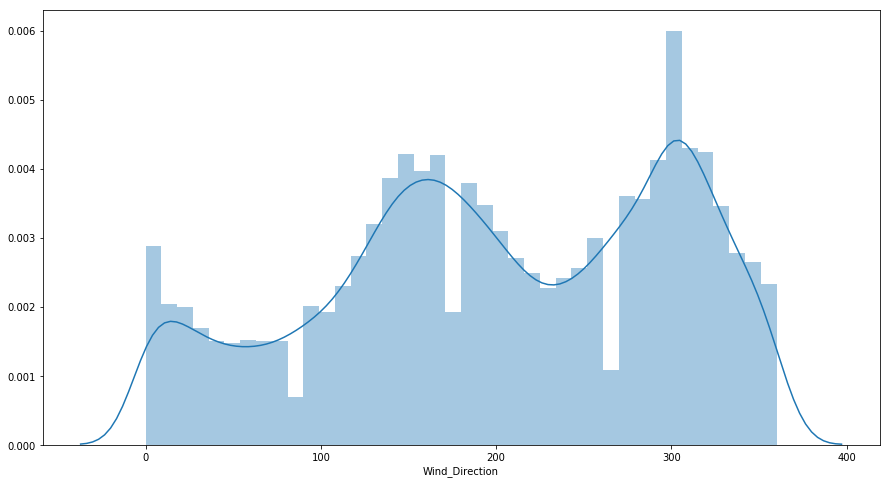

In [20]:
plt.figure(figsize=(15,8))
sns.distplot(weather_df['Wind_Direction'], kde=True)

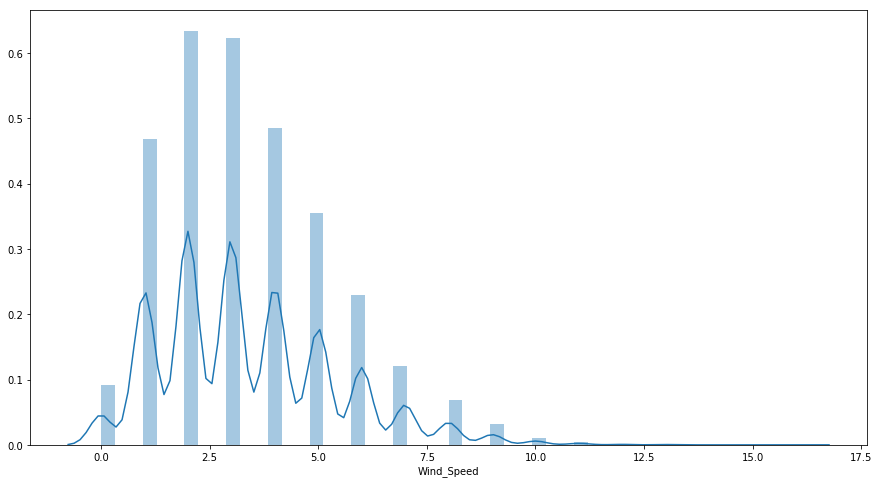

In [21]:
plt.figure(figsize=(15,8))
sns.distplot(weather_df['Wind_Speed'], kde=True)

In [23]:
#Humidity and Pressure fairly have a normal distribution

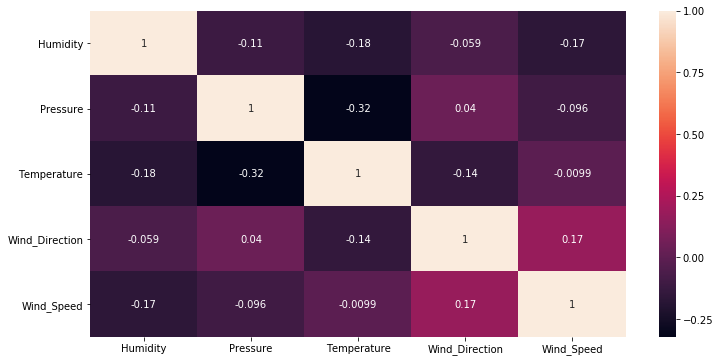

In [24]:
#Checking the correlation between the variables
plt.figure(figsize=(12,6))
sns.heatmap(weather_df.corr(), annot=True)

In [25]:
#No signs of MUlticollinearity

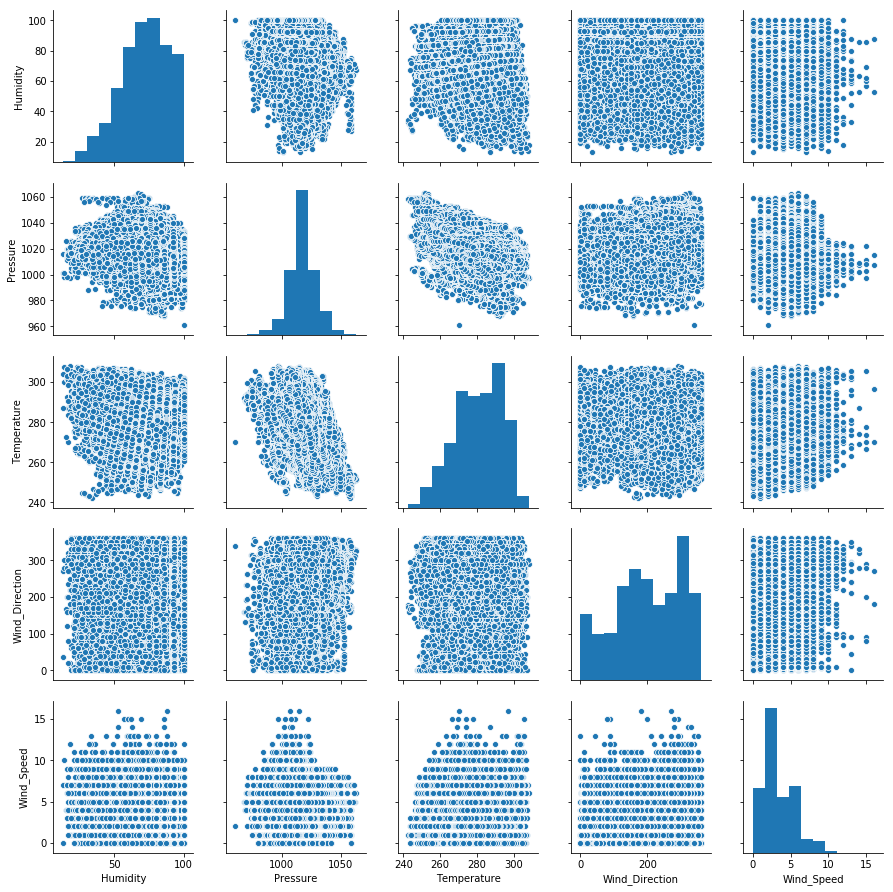

In [26]:
#Using a pairplot to Visualize all the variables
sns.pairplot(weather_df)

In [27]:
weather_df['Datetime'] = pd.to_datetime(weather_df['Datetime'])

In [28]:
#Extracting the date and time from the date time feature
weather_df['Day'] = weather_df['Datetime'].apply(lambda time: time.day)
weather_df['Time'] = weather_df['Datetime'].apply(lambda time: time.hour)

In [29]:
weather_df.head()

,Datetime,Description,Humidity,Pressure,Temperature,Wind_Direction,Wind_Speed,Day,Time
1,2012-10-01 13:00:00,broken clouds,67.0,1012.0,286.870000,330.0,3.0,1,13
2,2012-10-01 14:00:00,broken clouds,66.0,1012.0,286.893636,329.0,3.0,1,14
3,2012-10-01 15:00:00,broken clouds,66.0,1012.0,286.951401,329.0,3.0,1,15
4,2012-10-01 16:00:00,broken clouds,65.0,1012.0,287.009166,329.0,3.0,1,16
5,2012-10-01 17:00:00,broken clouds,65.0,1012.0,287.066931,328.0,3.0,1,17
